# Introduction


This project analyzes data from on-line dating application OKCupid. This type of app is a more frequent way to find people. The number of users increases daily and there are always new apps to try. The data used in these apps is an abundant source of information. The users give a lot of personal details to describe themselves.

The goal of this project is to scope, prep, analyze, and create a machine learning model to understand how the information can be used.

**Data sources:**

`profiles.csv` was provided by Codecademy.com.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
data = pd.read_csv('profiles.csv')

# Data Exploration

# Scoping

## Data

The project has one data set provided by Codecademy called `profiles.csv`. In the data, each row represents an OkCupid profile and the columns are the users’ responses to the app profile definition which include multiple choice and short answer questions.

## Project Goals

In this project, the goal is to utilize machine learning techniques to the data set. The intention is to find if any algorithm can help with the matching of the profiles.
The first part will be to study whether the users' self-description can be used to predict any of the other variables. This is important in order to fill the data where the users do not provide all the requested information.
The second part will be to understand how to match the profiles using only the users’ self-description.

## Analysis

This project will use descriptive statistics to find key figures in understanding the distribution, count, and relationship between variables. We will then select the variables that can be used as target for a prediction using a Naive Bayes’ algorithm.
For the second part, we will use the K-means clusterinf algorithm to find if we can group the profiles for matching.

## Evaluation
The project will conclude with the evaluation of the machine learning models. The output of the predictions can be checked through the accuracy. We will also assess the clustering performance with the Silhouette Score.

In [2]:
print(data.shape)
print(data.columns)
print(data.info())

(59946, 31)
Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  objec

There are 31 variables, corresponding to multiple choices questions and open questions.

There are 10 variables that are open descrition from the users.
- **essay0:** My self summary
- **essay1:**  What I’m doing with my life
- **essay2:** I’m really good at
- **essay3:** The first thing people usually notice about me
- **essay4:** Favorite books, movies, show, music, and food
- **essay5:** The six things I could never do without
- **essay6:** I spend a lot of time thinking about
- **essay7:** On a typical Friday night I am
- **essay8:** The most private thing I am willing to admit
- **essay9:** You should message me if…

In [3]:
nan_counts = data.isna().sum()
print(nan_counts.sort_values())

age                0
sex                0
orientation        0
location           0
last_online        0
income             0
status             0
height             3
speaks            50
drinks          2985
body_type       5296
essay0          5488
smokes          5512
ethnicity       5680
education       6628
essay1          7572
job             8198
essay2          9638
essay4         10537
essay5         10850
sign           11056
essay3         11476
essay7         12451
essay9         12603
essay6         13771
drugs          14080
essay8         19225
pets           19921
religion       20226
diet           24395
offspring      35561
dtype: int64


More variables are more complete than others.

count    59946.000000
mean        32.340290
std          9.452779
min         18.000000
25%         26.000000
50%         30.000000
75%         37.000000
max        110.000000
Name: age, dtype: float64


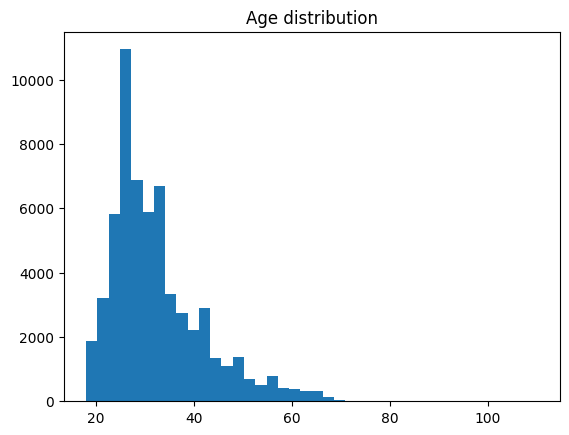

In [31]:
print(data['age'].describe())

plt.hist(data.age, bins=40)
plt.title('Age distribution')
plt.show()

sex
m    0.597688
f    0.402312
Name: count, dtype: float64
orientation
straight    0.860875
gay         0.092967
bisexual    0.046158
Name: count, dtype: float64


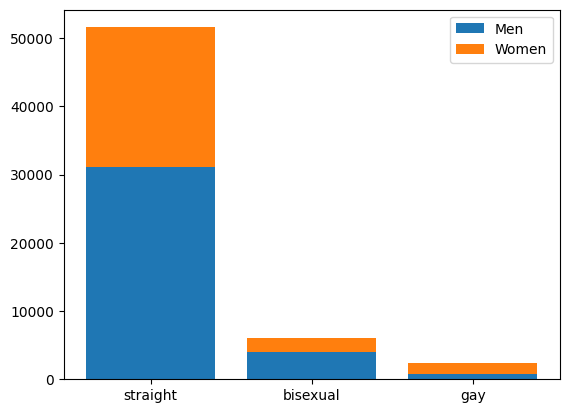

In [21]:
sex_count = data['sex'].value_counts()
sex_normalized_counts = sex_count / sex_count.sum()
print(sex_normalized_counts)

orientation_count = data['orientation'].value_counts()
orientation_normalized_counts = orientation_count / orientation_count.sum()
print(orientation_normalized_counts)

plt.bar(data.orientation.unique(), data.orientation[data.sex == 'm'].value_counts(), label = 'Men')
plt.bar(data.orientation.unique(), data.orientation[data.sex == 'f'].value_counts(),
        bottom= data.orientation[data.sex == 'm'].value_counts(), label='Women')

plt.title('Orientation Distribution')
plt.legend()
plt.show()

status
single            0.929120
seeing someone    0.034431
available         0.031111
married           0.005171
unknown           0.000167
Name: count, dtype: float64


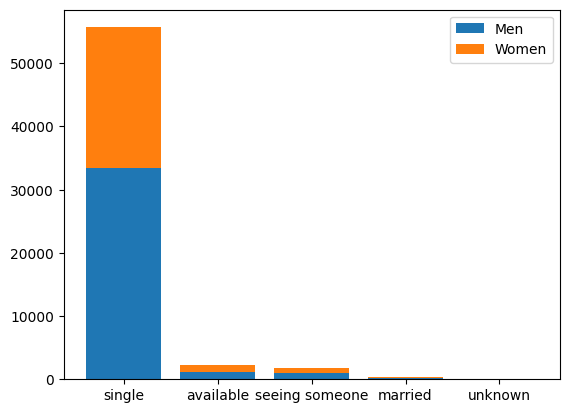

In [22]:
status_count = data['status'].value_counts()
status_normalized_counts = status_count / status_count.sum()
print(status_normalized_counts)

plt.bar(data.status.unique(), data.status[data.sex == 'm'].value_counts(), label = 'Men')
plt.bar(data.status.unique(), data.status[data.sex == 'f'].value_counts(),
        bottom= data.status[data.sex == 'm'].value_counts(), label='Women')
plt.title('Status distribution')
plt.legend()
plt.show()

In [24]:
body_type_count = data['body_type'].value_counts()
body_type_normalized_counts = body_type_count / body_type_count.sum()
print(body_type_normalized_counts)

body_type
average           0.268106
fit               0.232589
athletic          0.216267
thin              0.086203
curvy             0.071802
a little extra    0.048106
skinny            0.032516
full figured      0.018463
overweight        0.008124
jacked            0.007704
used up           0.006496
rather not say    0.003623
Name: count, dtype: float64


In [10]:
diet_count = data['diet'].value_counts()
diet_normalized_counts = diet_count / diet_count.sum()
print(diet_normalized_counts)

diet
mostly anything        0.466513
anything               0.173919
strictly anything      0.143822
mostly vegetarian      0.096875
mostly other           0.028326
strictly vegetarian    0.024613
vegetarian             0.018762
strictly other         0.012714
mostly vegan           0.009507
other                  0.009311
strictly vegan         0.006413
vegan                  0.003825
mostly kosher          0.002419
mostly halal           0.001350
strictly halal         0.000506
strictly kosher        0.000506
halal                  0.000309
kosher                 0.000309
Name: count, dtype: float64


In [11]:
drinks_count = data['drinks'].value_counts()
drinks_normalized_counts = drinks_count / drinks_count.sum()
print(drinks_normalized_counts)

drinks
socially       0.733484
rarely         0.104580
often          0.090659
not at all     0.057355
very often     0.008269
desperately    0.005653
Name: count, dtype: float64


In [12]:
drugs_count = data['drugs'].value_counts()
drugs_normalized_counts = drugs_count / drugs_count.sum()
print(drugs_normalized_counts)

drugs
never        0.822483
sometimes    0.168578
often        0.008939
Name: count, dtype: float64


In [14]:
smokes_count = data['smokes'].value_counts()
smokes_normalized_counts = smokes_count / smokes_count.sum()
print(smokes_normalized_counts)

smokes
no                0.806408
sometimes         0.069570
when drinking     0.055847
yes               0.040985
trying to quit    0.027189
Name: count, dtype: float64


In [8]:
print(data.education.value_counts())

education
graduated from college/university    23959
graduated from masters program        8961
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out of ph.d program            127
d

In [25]:
print(data.ethnicity.value_counts())

ethnicity
white                                                                 32831
asian                                                                  6134
hispanic / latin                                                       2823
black                                                                  2008
other                                                                  1706
                                                                      ...  
middle eastern, indian, white                                             1
asian, middle eastern, black, white, other                                1
asian, middle eastern, indian, hispanic / latin, white, other             1
black, native american, indian, pacific islander, hispanic / latin        1
asian, black, indian                                                      1
Name: count, Length: 217, dtype: int64


count    59943.000000
mean        68.295281
std          3.994803
min          1.000000
25%         66.000000
50%         68.000000
75%         71.000000
max         95.000000
Name: height, dtype: float64


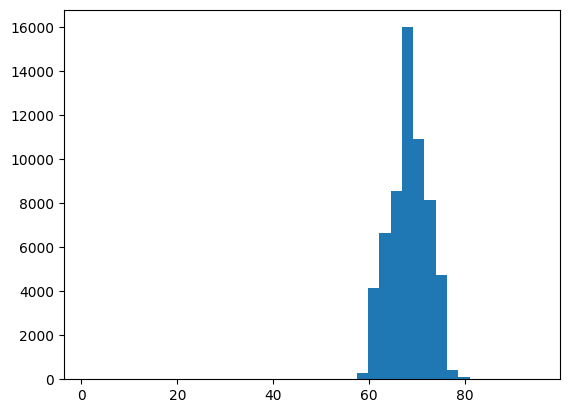

In [26]:
print(data.height.describe())

plt.hist(data.height, bins=40)
plt.title('Age distribution')
plt.legend()
plt.show()

In [29]:
print(data.job.value_counts())

job
other                                7589
student                              4882
science / tech / engineering         4848
computer / hardware / software       4709
artistic / musical / writer          4439
sales / marketing / biz dev          4391
medicine / health                    3680
education / academia                 3513
executive / management               2373
banking / financial / real estate    2266
entertainment / media                2250
law / legal services                 1381
hospitality / travel                 1364
construction / craftsmanship         1021
clerical / administrative             805
political / government                708
rather not say                        436
transportation                        366
unemployed                            273
retired                               250
military                              204
Name: count, dtype: int64


## Part 1: Predictions with Naive Bayes

The first part of the project is using Naive Bayes' classifier to check if the algrithm is reliable to classify the users based on their descriptions.

### Test no.1

The first model we are trying to implement is to guess the education based on the first four description released by the user.

In [32]:
# The first step is to transform the essays in a workable dataset.

essays = ['essay0', 'essay1', 'essay2', 'essay3']
data_w_description = data.dropna(subset=essays)
data_w_description = data_w_description.dropna(subset='education')

X_w_description = data_w_description['essay0']
for essay in essays[1:]:
    X_w_description += data_w_description[essay]
    
# We reduce the number of classes to work with.

def map_education_to_class(education):
    if education in ['dropped out of high school', 'working on high school', 'graduated from high school ', 
                     'dropped out of two-year college', 'high school', 'dropped out of college/university']:
        return 'High School'
    elif education in [ 'graduated from two-year college', 'two-year college', 'working on two-year college']:
        return 'Associate'
    elif education in ['working on college/university','graduated from college/university', 'college/university']:
        return 'Bachelor'
    elif education in ['dropped out of masters program', 'graduated from masters program',
                       'masters program', 'working on masters program']:
        return 'Master'
    elif education in ['working on ph.d program','graduated from ph.d program', 'ph.d program']:
        return 'PhD'
    elif education in [ 'dropped out of ph.d program', 'dropped out of space camp',
                       'space camp', 'graduated from space camp', 'working on space camp']:
        return 'Space camp'
    elif education in ['working on med school', 'dropped out of med school','graduated from med school', 'med school']:
        return 'Med'
    elif education in ['graduated from law school', 'law school', 'dropped out of law school', 'working on law school']:
        return 'Law'
    else:
        return 'Other'

y_w_description = data_w_description['education'].apply(map_education_to_class)

education_count = y_w_description.value_counts()
education_normalized_counts = education_count / education_count.sum()
print(education_normalized_counts)

education
Bachelor       0.566150
Master         0.208237
Associate      0.053405
PhD            0.042561
Space camp     0.037356
High School    0.027915
Law            0.026384
Other          0.025746
Med            0.012248
Name: count, dtype: float64


In [33]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split

stop_words = list(ENGLISH_STOP_WORDS)

vectorizer = CountVectorizer(stop_words=stop_words)
X_w_description_vectorized = vectorizer.fit_transform(X_w_description)

X_train, X_test, y_train, y_test = train_test_split(X_w_description_vectorized, y_w_description, test_size=0.2, random_state=42)

In [34]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with the prediction of the education: {accuracy:.2f}")

Accuracy with the prediction of the education: 0.56


Using the Naive Bayes classifier for the prediction of the education from the profile description is poorly accurate.

### Test n.2

Let's try using the same approach with sign.

In [35]:
def map_sign_to_class(education):
    if 'leo' in education:
        return 'leo'
    elif 'libra' in education:
        return 'libra'
    elif 'scorpio' in education:
        return 'scorpio'
    elif 'capricorn' in education:
        return 'capricorn'
    elif 'gemini' in education:
        return 'gemini'
    elif 'cancer' in education:
        return 'cancer'
    elif 'virgo' in education:
        return 'virgo'
    elif 'taurus' in education:
        return 'taurus'
    elif 'aries' in education:
        return 'aries'
    elif 'pisces' in education:
        return 'pisces'
    elif 'aquarius' in education:
        return 'aquarius'
    else:
        return 'sagittarius'

data_w_description = data.dropna(subset=essays)
data_w_description = data_w_description.dropna(subset='sign')

X_w_description = data_w_description['essay0']
for essay in essays[1:]:
    X_w_description += data_w_description[essay]

X_w_description_vectorized = vectorizer.fit_transform(X_w_description)
y_w_description = data_w_description['sign'].apply(map_sign_to_class)
print(y_w_description.value_counts())

X_train, X_test, y_train, y_test = train_test_split(X_w_description_vectorized, y_w_description, test_size=0.2, random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with the prediction of the sign: {accuracy:.2f}")

sign
leo            3263
gemini         3224
libra          3191
cancer         3158
virgo          3134
taurus         3085
scorpio        3040
aries          3019
sagittarius    2956
pisces         2921
aquarius       2910
capricorn      2639
Name: count, dtype: int64
Accuracy with the prediction of the sign: 0.10


The Naive Bayes' algorithm did not give good results for the predictions from the user's essay.

## Part 2: Clustering the users

In this part of the project, we will use unsupervised machine learning to uncover the patterns within the users' description. The objective is to find groups of users that can be matched using only the profiles' statements.

We will implement the k-means algorithm on the data to check if there are coherent clusters.

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Test n.3

We use the first four summaries:

- **essay0:** My self summary
- **essay1:**  What I’m doing with my life
- **essay2:** I’m really good at
- **essay3:** The first thing people usually notice about me

These self-presentation contains generic information but it is interesting to understand how the algorithm behave.

C:\Users\Andriatinavola.Luc\AppData\Local\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Andriatinavola.Luc\AppData\Local\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Andriatinavola.Luc\AppData\Local\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Andriatinavola.Luc\AppData\Local\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

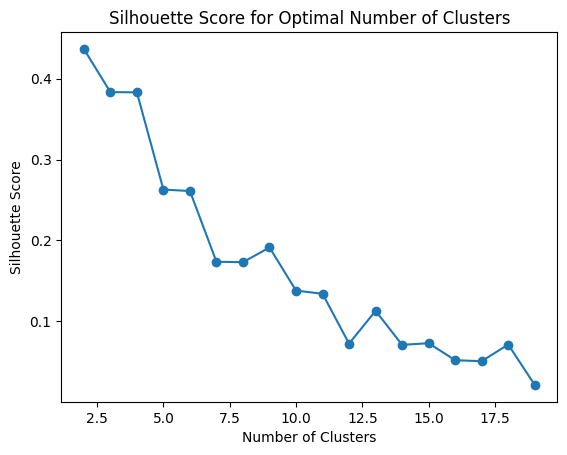

In [40]:
# Try different numbers of clusters
cluster_range = range(2, 20)
silhouette_scores = []

for n_clusters in cluster_range:
    model = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = model.fit_predict(X_w_description_vectorized)
    silhouette_avg = silhouette_score(X_w_description_vectorized, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()

### Test n.4

From the previous test, it appears that the data did not have usable information for the algorith. Even at low number of clusters, the silhouette score remain low.

We will use the fourth user description that have less dispersive information.

- **essay4:** Favorite books, movies, show, music, and food

C:\Users\Andriatinavola.Luc\AppData\Local\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Andriatinavola.Luc\AppData\Local\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Andriatinavola.Luc\AppData\Local\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Andriatinavola.Luc\AppData\Local\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

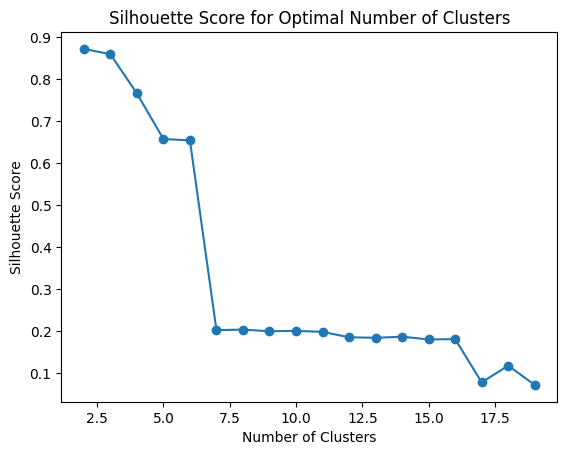

In [43]:
X_w_description4 = data['essay4'].dropna()
X_w_description4_vectorized = vectorizer.fit_transform(X_w_description4)

# Try different numbers of clusters
cluster_range = range(2, 20)
silhouette_scores = []

for n_clusters in cluster_range:
    model = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = model.fit_predict(X_w_description4_vectorized)
    silhouette_avg = silhouette_score(X_w_description4_vectorized, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()

## Test n.5

C:\Users\Andriatinavola.Luc\AppData\Local\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Andriatinavola.Luc\AppData\Local\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Andriatinavola.Luc\AppData\Local\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Andriatinavola.Luc\AppData\Local\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

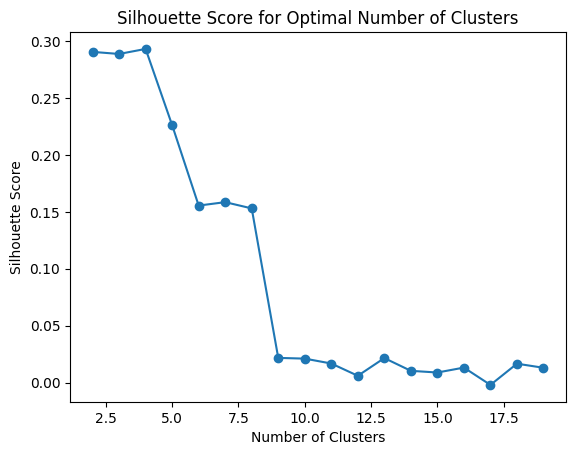

In [44]:
X_w_description5 = data['essay5'].dropna()
X_w_description5_vectorized = vectorizer.fit_transform(X_w_description5)

# Try different numbers of clusters
cluster_range = range(2, 20)
silhouette_scores = []

for n_clusters in cluster_range:
    model = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = model.fit_predict(X_w_description5_vectorized)
    silhouette_avg = silhouette_score(X_w_description5_vectorized, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()

### Test n.6

C:\Users\Andriatinavola.Luc\AppData\Local\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Andriatinavola.Luc\AppData\Local\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Andriatinavola.Luc\AppData\Local\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Andriatinavola.Luc\AppData\Local\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

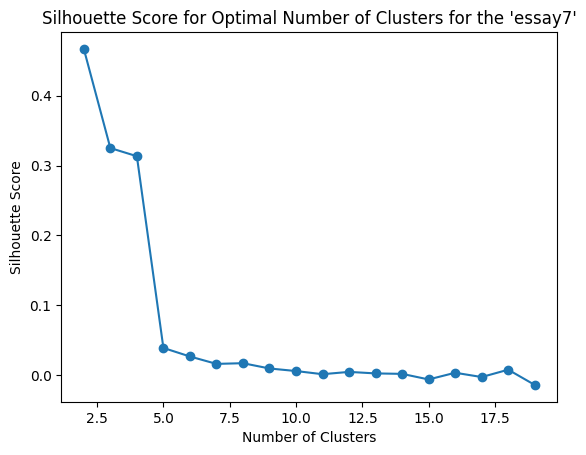

In [45]:
X_w_description7 = data['essay7'].dropna()
X_w_description7_vectorized = vectorizer.fit_transform(X_w_description7)

# Try different numbers of clusters
cluster_range = range(2, 20)
silhouette_scores = []

for n_clusters in cluster_range:
    model = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = model.fit_predict(X_w_description7_vectorized)
    silhouette_avg = silhouette_score(X_w_description7_vectorized, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters for the \'essay7\'')
plt.show()